<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/25_9_2_Assignment_UMAPipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset and make your preprocessing like normalizing the data.

Apply UMAP to the data.

Using the two-dimensional UMAP representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

Do you think UMAP solution is satisfactory? Can you distinguish between different classes easily?

Which one has done a better job: UMAP or the others (t-SNE or PCA) that you applied in the assignments of the previous checkpoints?

Now, play with the different hyperparameter values of the UMAP and apply UMAP for each of them.

Which combination is the best in terms of the two-dimensional representation clarity?

In [9]:
!pip install umap-learn

import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
import umap

In [0]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [0]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


**WHEN I DOUBLED NEIGHBORS TOOK LONGER TO RUN**

In [13]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP done! Time elapsed: 38.08465123176575 seconds


In [14]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 10}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

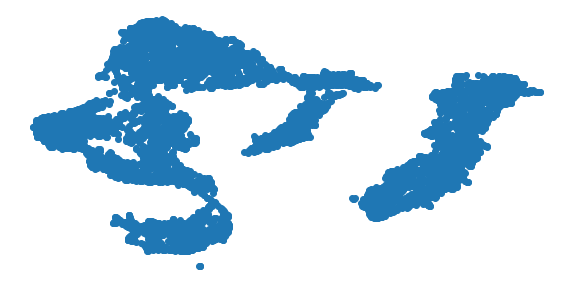

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()